In [6]:
import tensorflow as tf
import pandas as pd 
import seaborn as sb
sb.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [7]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
data.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

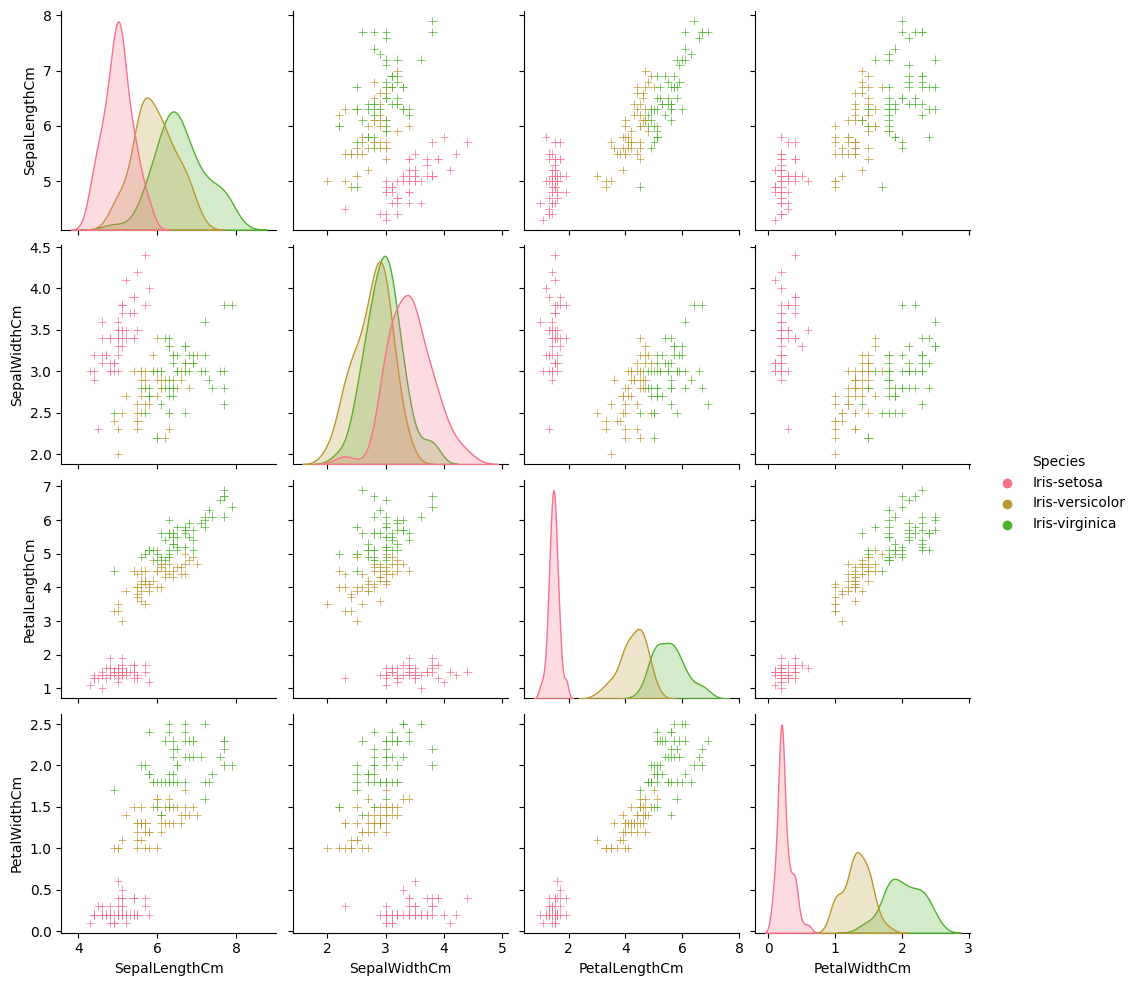

In [11]:
tmp = data.drop('Id',axis=1)
g=sb.pairplot(tmp,hue="Species",markers="+")
plt.show()

In [12]:
x=data['Species']
print(x.shape)

(150,)


In [ ]:
data.shape

# Modelling with scikit learn

In [14]:
X=data.drop(['Id','Species'],axis=1)
y=data['Species']
print(X.shape)
print(y.shape)

(150, 4)
(150,)


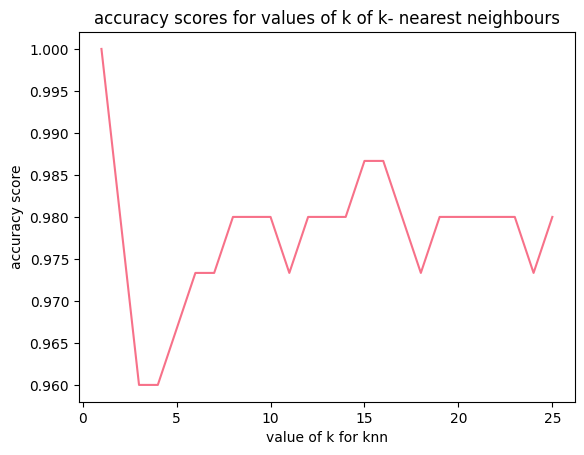

In [15]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y,y_pred))
    
plt.plot(k_range,scores)
plt.xlabel('value of k for knn')
plt.ylabel('accuracy score')
plt.title('accuracy scores for values of k of k- nearest neighbours')
plt.show()

In [17]:
logreg =  LogisticRegression()
logreg.fit(X,y)
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y,y_pred))

0.9733333333333334


In [20]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.4,random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


In [25]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn =KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
    

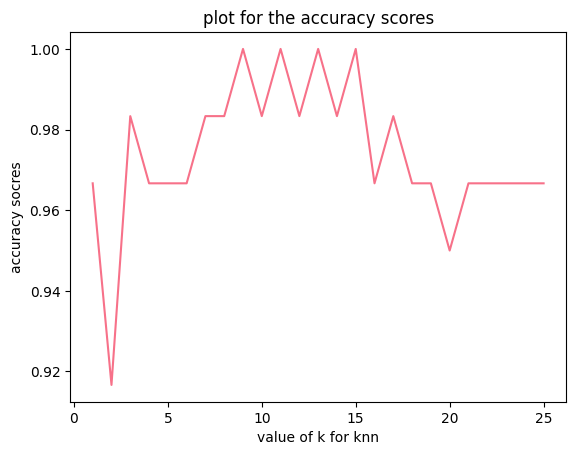

In [27]:
plt.plot(k_range,scores)
plt.xlabel('value of k for knn')
plt.ylabel('accuracy socres')
plt.title('plot for the accuracy scores')
plt.show()

In [29]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))


0.9833333333333333


# testing the data model for the examples


In [30]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)
knn.predict([[6, 3, 4, 2]])

C:\python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype=object)